<img src="notebook_assets/feup.png" width="20%" align="left"/>
<br><br><br><br><br><br>

# News Popularity in Social Media Platforms (Facebook, Google+, LinkedIn)
## Final Delivery
### Artificial Intelligence (IART) - 3<sup>rd</sup> year of Integrated Masters in Informatics and Computing Engineering

#### Work done by:
* Pedro Xavier Tavares Monteiro Correia de Pinho - up201605166@fe.up.pt
* Miguel Alexandre Brandão Teixeira - up201605150@fe.up.pt

The dataset we used can be found [here](http://archive.ics.uci.edu/ml/datasets/News+Popularity+in+Multiple+Social+Media+Platforms).

This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn. 
The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: economy, microsoft, obama and palestine. 
This data set is tailored for evaluative comparisons in predictive analytics tasks, although allowing for tasks in other research areas such as topic detection and tracking, sentiment analysis in short text, first story detection or news recommendation.

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
COLORS = {"Facebook": "royalblue", "GooglePlus": "tomato", "LinkedIn": "dodgerblue"}

### Import News Data

In [3]:
# news_data is DataFrame type
news_data = pd.read_csv('News_Final.csv', index_col=0)

news_data.head()

,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
IDLink,,,,,,,,,,
99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


* IDLink (numeric): Unique identifier of news items 
* Title (string): Title of the news item according to the official media sources 
* Headline (string): Headline of the news item according to the official media sources 
* Source (string): Original news outlet that published the news item 
* Topic (string): Query topic used to obtain the items in the official media sources 
* PublishDate (timestamp): Date and time of the news items' publication 
* SentimentTitle (numeric): Sentiment score of the text in the news items' title 
* SentimentHeadline (numeric): Sentiment score of the text in the news items' headline 
* Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook 
* GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+ 
* LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn

### Convert each PublishDate to an integer representing the weekday of that PublishDate

In [4]:
# Convert PublishDate to weekday integer
news_data['PublishDate'] = pd.to_datetime(news_data['PublishDate'],infer_datetime_format=True)
news_data['PublishDay'] = news_data['PublishDate'].apply(lambda x: x.weekday())
news_data['PublishHour'] = news_data['PublishDate'].apply(lambda x: x.hour)

def topic_to_integer(topic):
    if (topic == 'obama'):
        return 0;
    elif (topic == 'economy'):
        return 1;
    elif (topic == 'microsoft'):
        return 2;
    else:
        return 3;
    
# Convert Topic to integer (Obama = 0, Economy = 1, Microsoft = 2, Palestine = 3)
news_data['Topic'] = news_data['Topic'].apply(topic_to_integer)

In [5]:
# Eliminate News with popularity equal to -1, since this means they were not published in that specific platform
news_dataFB = news_data.loc[news_data['Facebook'] >= 0, ['Topic', 'PublishDay', 'PublishHour', 'SentimentTitle', 'SentimentHeadline', 'Facebook']]
news_dataGP = news_data.loc[news_data['GooglePlus'] >= 0, ['Topic', 'PublishDay', 'PublishHour', 'SentimentTitle', 'SentimentHeadline', 'GooglePlus']]
news_dataLI = news_data.loc[news_data['LinkedIn'] >= 0, ['Topic', 'PublishDay', 'PublishHour', 'SentimentTitle', 'SentimentHeadline', 'LinkedIn']]

features = ['Topic', 'PublishDay', 'PublishHour', 'SentimentTitle', 'SentimentHeadline']
responses = ['Facebook', 'GooglePlus', 'LinkedIn']

# X - Features (data to learn from)
X = {'Facebook' : news_dataFB.loc[:,features], 'GooglePlus' : news_dataGP.loc[:,features], 'LinkedIn' : news_dataLI.loc[:,features]}

# Y - Response (respective data results)
Y = {'Facebook' : news_dataFB.loc[:,'Facebook'], 'GooglePlus' : news_dataGP.loc[:,'GooglePlus'], 'LinkedIn' : news_dataLI.loc[:,'LinkedIn']}

# Displays last 5 rows (by default)
for key, value in X.items():
    print(value.shape)
    display(value.tail())

# Displays last 5 rows (by default)
for key, value in Y.items():
    print(value.shape)
    display(value.tail())

(81637, 5)


,Topic,PublishDay,PublishHour,SentimentTitle,SentimentHeadline
IDLink,,,,,
104788.0,0,3,14,-0.229171,-0.163486
104797.0,0,3,14,-0.505181,0.098752
104799.0,3,3,15,-0.047246,-0.106600
104793.0,3,3,15,0.291667,-0.139754
104794.0,3,3,15,0.121534,0.092313


(87495, 5)


,Topic,PublishDay,PublishHour,SentimentTitle,SentimentHeadline
IDLink,,,,,
61851.0,1,3,15,0.104284,0.044943
61865.0,1,3,15,0.072194,0.000000
104793.0,3,3,15,0.291667,-0.139754
104794.0,3,3,15,0.121534,0.092313
61870.0,2,3,16,0.000000,0.054554


(87494, 5)


,Topic,PublishDay,PublishHour,SentimentTitle,SentimentHeadline
IDLink,,,,,
61851.0,1,3,15,0.104284,0.044943
61865.0,1,3,15,0.072194,0.000000
104793.0,3,3,15,0.291667,-0.139754
104794.0,3,3,15,0.121534,0.092313
61870.0,2,3,16,0.000000,0.054554


(81637,)


IDLink
104788.0    9
104797.0    0
104799.0    4
104793.0    5
104794.0    0
Name: Facebook, dtype: int64

(87495,)


IDLink
61851.0     3
61865.0     0
104793.0    1
104794.0    0
61870.0     1
Name: GooglePlus, dtype: int64

(87494,)


IDLink
61851.0     5
61865.0     1
104793.0    0
104794.0    0
61870.0     0
Name: LinkedIn, dtype: int64

In [6]:
import seaborn as sns

new_labels = ['Obama', 'Economy', 'Microsoft', 'Palestine']

fbpp = sns.pairplot(news_dataFB, x_vars=['Topic', 'SentimentTitle', 'SentimentHeadline'], hue='Topic', y_vars=['Facebook'], height=10, aspect=0.5)
fbpp.axes[0,0].set_xticks([0, 1, 2, 3])
fbpp.axes[0,0].set_xticklabels(new_labels)
for t, l in zip(fbpp._legend.texts, new_labels): t.set_text(l)
    
gppp = sns.pairplot(news_dataGP, x_vars=['Topic', 'SentimentTitle', 'SentimentHeadline'], hue='Topic', y_vars=['GooglePlus'], height=10, aspect=0.5)
gppp.axes[0,0].set_xticks([0, 1, 2, 3])
gppp.axes[0,0].set_xticklabels(new_labels)
for t, l in zip(gppp._legend.texts, new_labels): t.set_text(l)
    
lipp = sns.pairplot(news_dataLI, x_vars=['Topic', 'SentimentTitle', 'SentimentHeadline'], hue='Topic', y_vars=['LinkedIn'], height=10, aspect=0.5)
lipp.axes[0,0].set_xticks([0, 1, 2, 3])
lipp.axes[0,0].set_xticklabels(new_labels)
for t, l in zip(lipp._legend.texts, new_labels): t.set_text(l)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


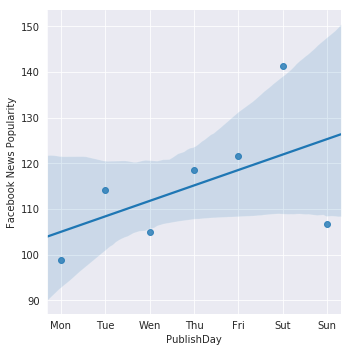

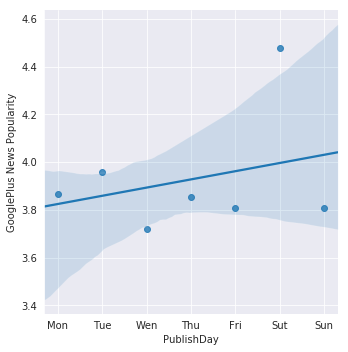

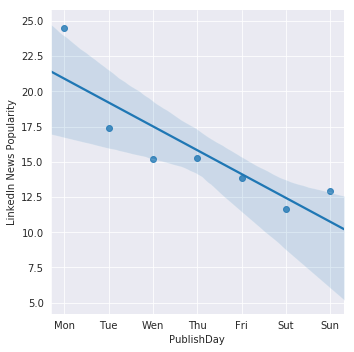

In [7]:
sns.set_style("darkgrid")

for platform in responses: 
    pp = sns.pairplot(data=news_data.groupby('PublishDay', as_index=False).mean(), x_vars=['PublishDay'], y_vars=platform, height=5, kind='reg').set(ylabel='{} News Popularity'.format(platform))
    pp.axes[0,0].set_xticklabels(['Mon','Tue','Wen','Thu','Fri','Sut','Sun'])
    pp.axes[0,0].set_xticks([0, 1, 2, 3, 4, 5, 6])

Text(0.5, 0, 'Average Popularity')

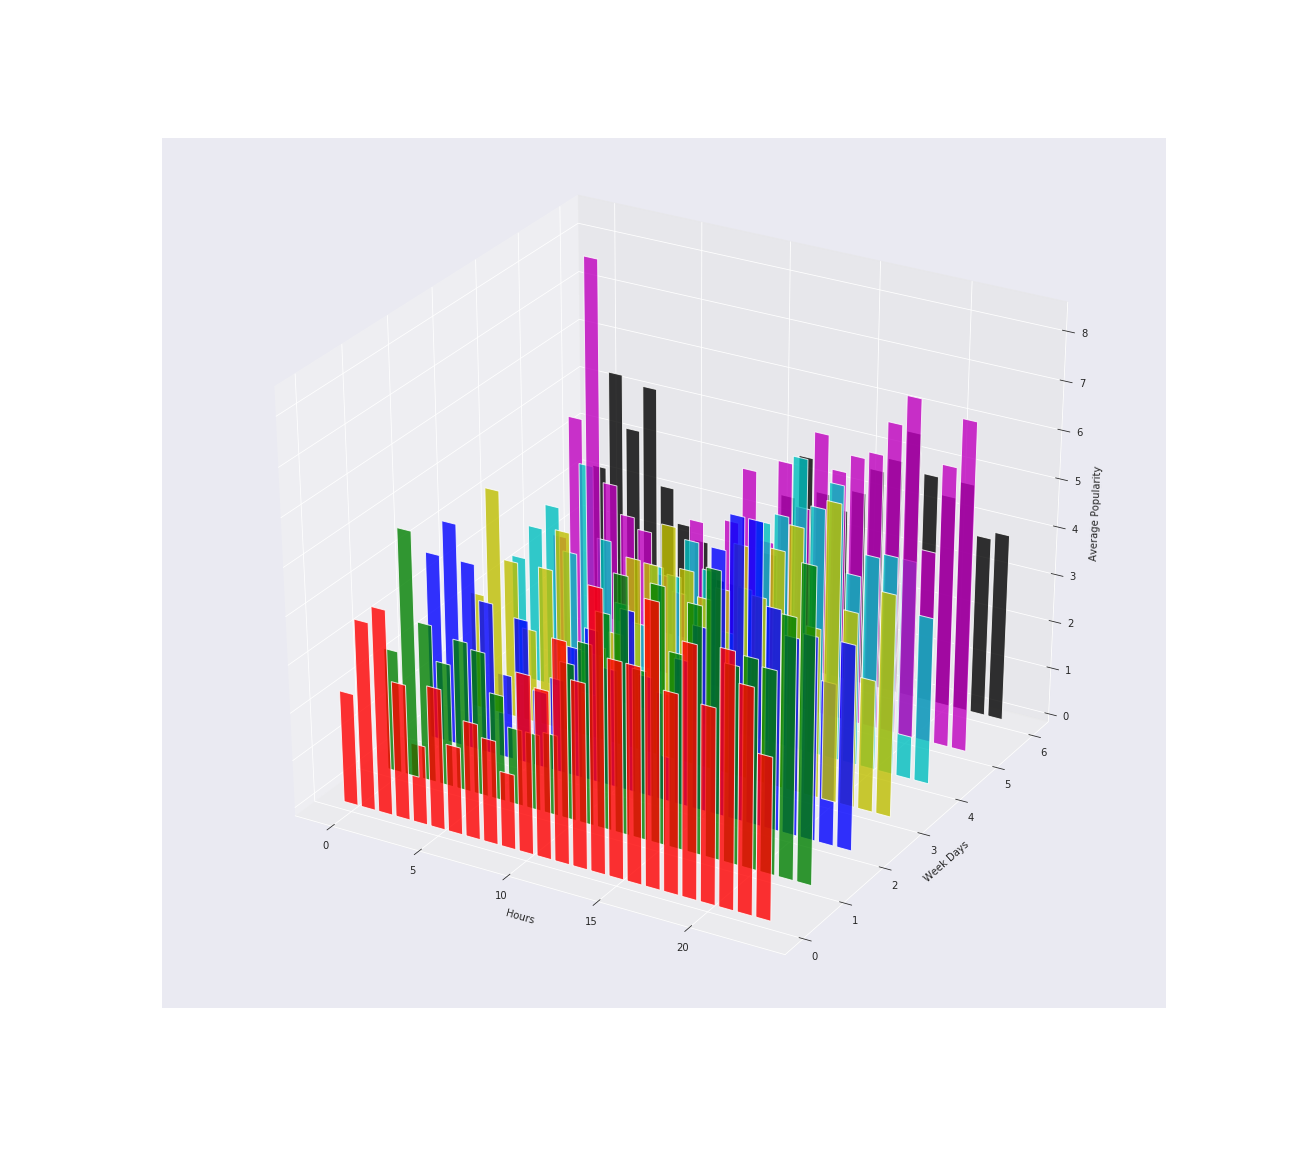

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

# allows for better scaling of resulting 3D plot
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

news_data_temp = news_data.groupby(['PublishDay','PublishHour']).mean()

ax = plt.figure(1, figsize=(18, 16)).add_subplot(111, projection='3d')

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

# 0 - Monday
weekDays = list(range(7))
hours = list(range(24))
verts = []

colors = [cc('r'), cc('g'), cc('b'), cc('y'), cc('c'), cc('m'), cc('k')]
for weekDay in weekDays:
    ax.bar(hours, news_data_temp.loc[weekDay,'GooglePlus'], zs=weekDay, zdir='y', color=colors[weekDay], alpha=0.8)
   
ax.set_xlabel('Hours')
ax.set_ylabel('Week Days')
ax.set_zlabel('Average Popularity')

## K-nearest neighbors
### Train/Test Split

In [9]:
# Overfitting - creating an unnecessary complex model
# Low value of K creates a High Complexity Model, because it follows the noise in the data
# Its learns the noise and not the signal
# For KNN models, lower K value = more complex

# Explained Variance => 1.00 is the best possible score (lower is worse)

platformsScores = {}

for platform in responses:  
    # Split the data between training and testing randomly
    # test_size = 0.25 (default)
    # random_state
    print(platform)
    
    X_train, X_test, y_train, y_test = train_test_split(X[platform], Y[platform])

    training_explained_variance_scores = []
    testing_explained_variance_scores = []

    training_root_mean_squared_errors = []
    testing_root_mean_squared_errors = []

    # Determine best K value for this data
    k_range = range(1, 26)
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
#         print(knn)

         # Train the model
        knn.fit(X_train, y_train)

        # Test the model with the same train Data
        y_train_predicted = knn.predict(X_train)
        
        # Record training score
        training_explained_variance_scores.append(explained_variance_score(y_train, y_train_predicted))
        # Record the RMSE (Root Mean Squared Error)
        training_root_mean_squared_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predicted)))

        # Test the model with new test Data
        y_test_predicted = knn.predict(X_test)
        
        # Record testing score
        testing_explained_variance_scores.append(explained_variance_score(y_test, y_test_predicted))
        # Record the RMSE (Root Mean Squared Error)
        testing_root_mean_squared_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predicted)))    

    platformsScores[platform] = (training_explained_variance_scores,
                                 training_root_mean_squared_errors,
                                 testing_explained_variance_scores, 
                                 testing_root_mean_squared_errors)

print('Finished!')

Facebook
GooglePlus
LinkedIn
Finished!


### Plot Data
[Interactive visualization of KNN](http://scott.fortmann-roe.com/docs/BiasVariance.html#chart_region_knn)

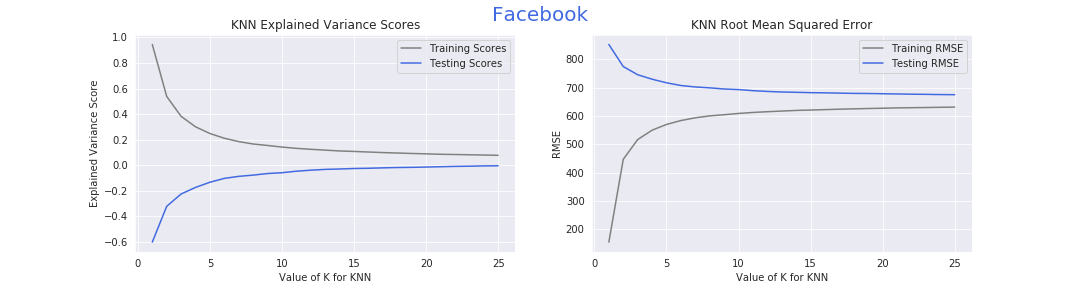

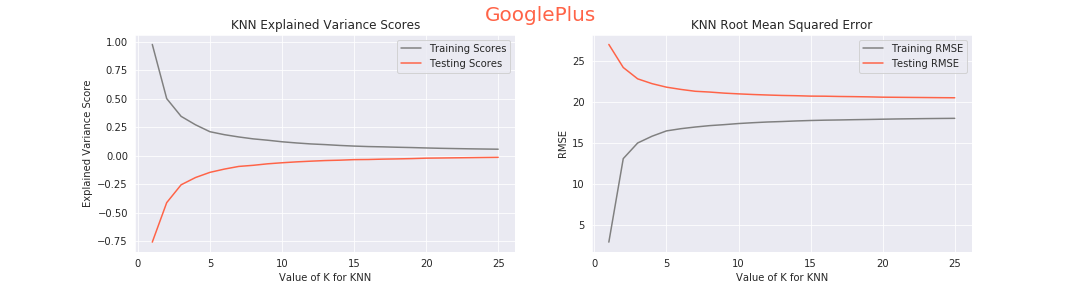

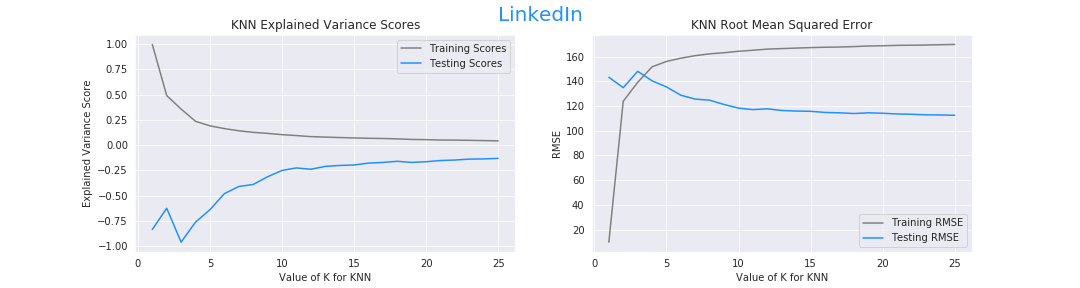

In [10]:
# allows plots to appear within the notebook
%matplotlib inline

i = 1
for platform in responses:
    
    scores = platformsScores[platform]
    
    sns.set_style("darkgrid")
    plt.figure(i, figsize=(15,4)).suptitle(platform, fontsize=20, color=COLORS[platform])
    plt.subplot(121)
    plt.plot(k_range, scores[0], color='grey', label='Training Scores')
    plt.plot(k_range, scores[2], color=COLORS[platform], label='Testing Scores')

    plt.title('KNN Explained Variance Scores')
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Explained Variance Score')
    plt.grid(True)
    plt.legend()


    plt.subplot(122)
    plt.plot(k_range, scores[1], color='grey', label='Training RMSE')
    plt.plot(k_range, scores[3], color=COLORS[platform], label='Testing RMSE')

    plt.title('KNN Root Mean Squared Error')
    plt.xlabel('Value of K for KNN')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()
    
    i += 1

## Support Vector Regression
### Train/Test Split

In [11]:
from sklearn.svm import SVR 

svr_rbf = SVR(gamma=.1, C=100, epsilon=.1, max_iter=3000)
svr_lin = SVR(kernel='linear', C=100, gamma='scale', max_iter=3000)
svr_poly = SVR(kernel='poly', C=100, gamma='scale', degree=3, epsilon=.1, coef0=1, max_iter=3000)

svrModels = [svr_rbf, svr_lin, svr_poly]

platformsScoresSVR = {}

for platform in responses:  
    # Split the data between training and testing randomly
    # test_size = 0.25 (default)
    # random_state
    print(platform)
    
    X_train, X_test, y_train, y_test = train_test_split(X[platform], Y[platform])

    training_explained_variance_scores = []
    testing_explained_variance_scores = []

    training_root_mean_squared_errors = []
    testing_root_mean_squared_errors = []

    for svr in svrModels:
        print(svr)

         # Train the model
        svr.fit(X_train, y_train)

        # Test the model with the same train Data
        y_train_predicted = svr.predict(X_train)

        # Record training score
        training_explained_variance_scores.append(explained_variance_score(y_train, y_train_predicted))
        # Record the RMSE (Root Mean Squared Error)
        training_root_mean_squared_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predicted)))

        # Test the model with new test Data
        y_test_predicted = svr.predict(X_test)

        # Record testing score
        testing_explained_variance_scores.append(explained_variance_score(y_test, y_test_predicted))
        # Record the RMSE (Root Mean Squared Error)
        testing_root_mean_squared_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predicted)))    

    platformsScoresSVR[platform] = (training_explained_variance_scores,
                                 training_root_mean_squared_errors,
                                 testing_explained_variance_scores, 
                                 testing_root_mean_squared_errors)

print('Finished!')

Facebook
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=3000, shrinking=True, tol=0.001, verbose=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='linear', max_iter=3000, shrinking=True, tol=0.001, verbose=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='scale',
  kernel='poly', max_iter=3000, shrinking=True, tol=0.001, verbose=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GooglePlus
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=3000, shrinking=True, tol=0.001, verbose=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='linear', max_iter=3000, shrinking=True, tol=0.001, verbose=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='scale',
  kernel='poly', max_iter=3000, shrinking=True, tol=0.001, verbose=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


LinkedIn
SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=3000, shrinking=True, tol=0.001, verbose=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
  kernel='linear', max_iter=3000, shrinking=True, tol=0.001, verbose=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='scale',
  kernel='poly', max_iter=3000, shrinking=True, tol=0.001, verbose=False)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Finished!


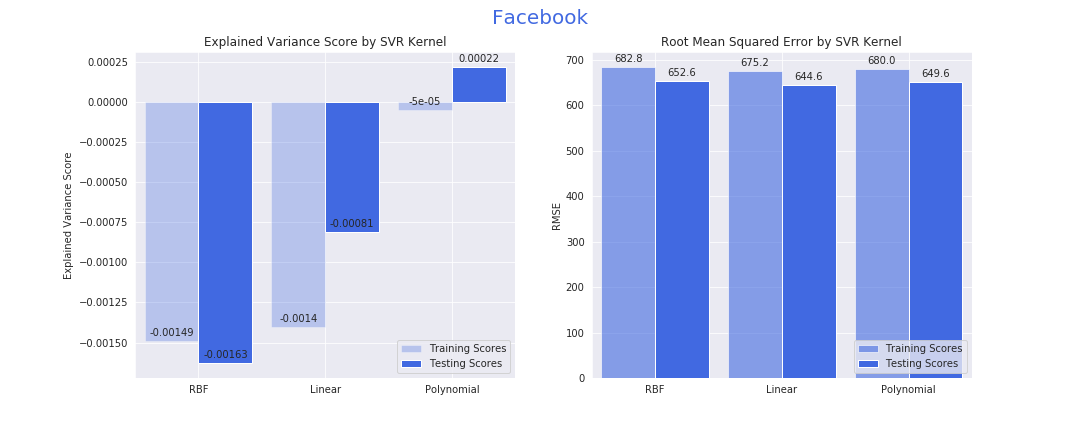

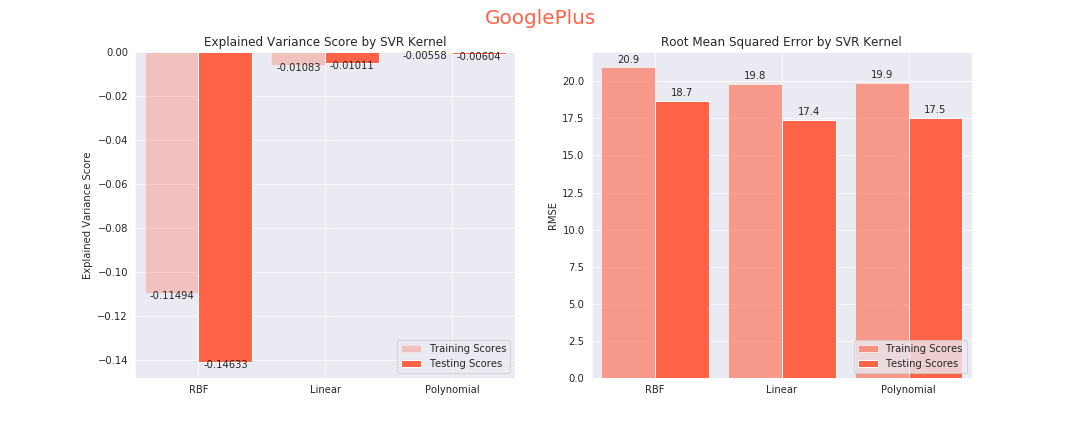

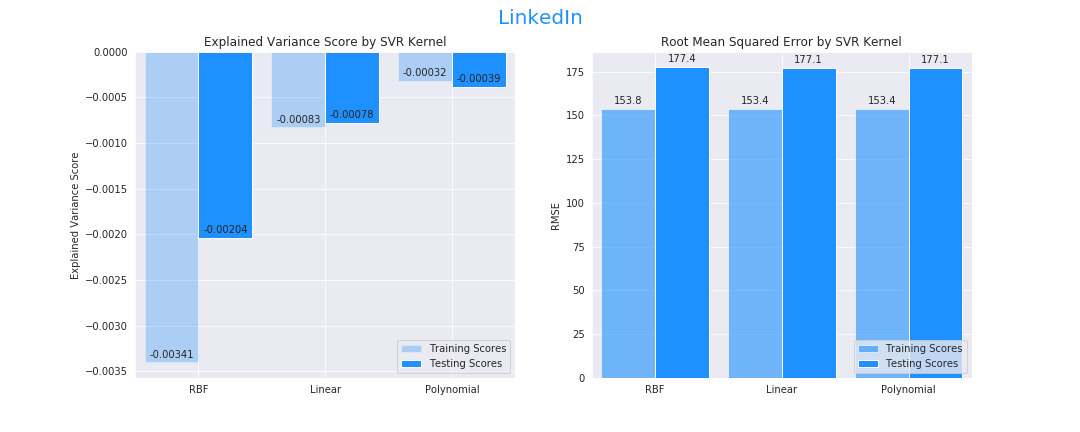

In [12]:
# allows plots to appear within the notebook
%matplotlib inline

import matplotlib.ticker as ticker
# Shows Only RMSE

def autolabel(rects, ax, adjustLabel=0, decimal=5, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        height += adjustLabel
        height = round(height, decimal)
            
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

ind = np.arange(1, 6, 2)  # the x locations for the groups
width = 0.85  # the width of the bars
sns.set_style("darkgrid")
   
for platform in responses:
    scores = platformsScoresSVR[platform]

    fig, ax = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)
    fig.suptitle(platform, fontsize=20, color=COLORS[platform])

    rects1 = ax[0].bar(ind - width/2, scores[0], width, label='Training Scores', color=COLORS[platform], alpha=0.3)
    rects2 = ax[0].bar(ind + width/2, scores[2], width, label='Testing Scores', color=COLORS[platform])

    ax[0].set_ylabel('Explained Variance Score')
    ax[0].set_title('Explained Variance Score by SVR Kernel')
    ax[0].set_xticks(ind)
    ax[0].set_xticklabels(('RBF', 'Linear', 'Polynomial'))
    ax[0].set_xlim(left=0, right=6)
    ax[0].legend(loc='lower right')

    if platform == 'GooglePlus':
        autolabel(rects1, ax[0], -0.005)
        autolabel(rects2, ax[0], -0.005)
    else:
        autolabel(rects1, ax[0])
        autolabel(rects2, ax[0])

    rects3 = ax[1].bar(ind - width/2, scores[1], width, label='Training Scores', color=COLORS[platform], alpha=0.6)
    rects4 = ax[1].bar(ind + width/2, scores[3], width, label='Testing Scores', color=COLORS[platform])

    ax[1].set_ylabel('RMSE')
    ax[1].set_title('Root Mean Squared Error by SVR Kernel')
    ax[1].set_xticks(ind)
    ax[1].set_xticklabels(('RBF', 'Linear', 'Polynomial'))
    ax[1].set_xlim(left=0, right=6)
    ax[1].legend(loc='lower right')

    autolabel(rects3, ax[1], 0, 1)
    autolabel(rects4, ax[1], 0, 1)
    
    plt.show()

## Neural Network
### Train/Test Split

In [13]:
from sklearn.neural_network import MLPRegressor

max_iter_array = [50, 100, 150, 200, 250]

platformsScoresMLPR = {}

for platform in responses:  
    print('Starting models in', platform, 'dataset.')
    
    X_train, X_test, y_train, y_test = train_test_split(X[platform], Y[platform])

    training_explained_variance_scores = []
    testing_explained_variance_scores = []

    training_root_mean_squared_errors = []
    testing_root_mean_squared_errors = []

    for mi in max_iter_array:
        mlpr = MLPRegressor(max_iter=mi)
        print('MLPRegressor - max_iter =', mi)

         # Train the model
        mlpr.fit(X_train, y_train)

        # Test the model with the same train Data
        y_train_predicted = mlpr.predict(X_train)
        
        # Record training score
        training_explained_variance_scores.append(explained_variance_score(y_train, y_train_predicted))
        # Record the RMSE (Root Mean Squared Error)
        training_root_mean_squared_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predicted)))

        # Test the model with new test Data
        y_test_predicted = mlpr.predict(X_test)
        
        # Record testing score
        testing_explained_variance_scores.append(explained_variance_score(y_test, y_test_predicted))
        # Record the RMSE (Root Mean Squared Error)
        testing_root_mean_squared_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predicted)))    

    platformsScoresMLPR[platform] = (training_explained_variance_scores,
                                     training_root_mean_squared_errors,
                                     testing_explained_variance_scores, 
                                     testing_root_mean_squared_errors)


print('Finished!')

Starting models in Facebook dataset.
MLPRegressor - max_iter = 50


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor - max_iter = 100
MLPRegressor - max_iter = 150
MLPRegressor - max_iter = 200
MLPRegressor - max_iter = 250
Starting models in GooglePlus dataset.
MLPRegressor - max_iter = 50


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor - max_iter = 100


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor - max_iter = 150


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor - max_iter = 200
MLPRegressor - max_iter = 250
Starting models in LinkedIn dataset.
MLPRegressor - max_iter = 50


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor - max_iter = 100


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor - max_iter = 150
MLPRegressor - max_iter = 200
MLPRegressor - max_iter = 250
Finished!


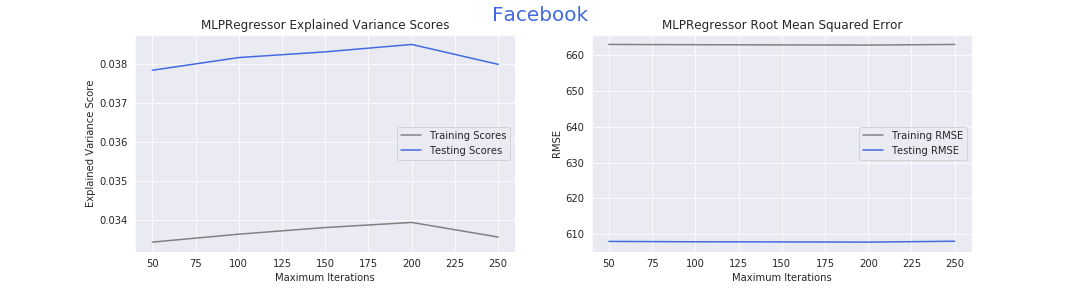

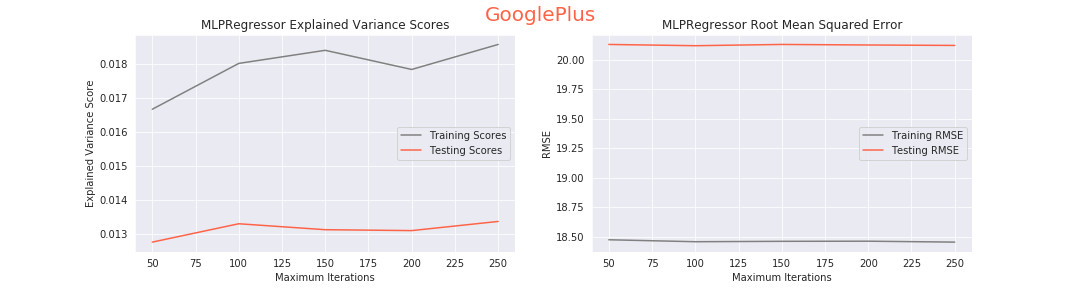

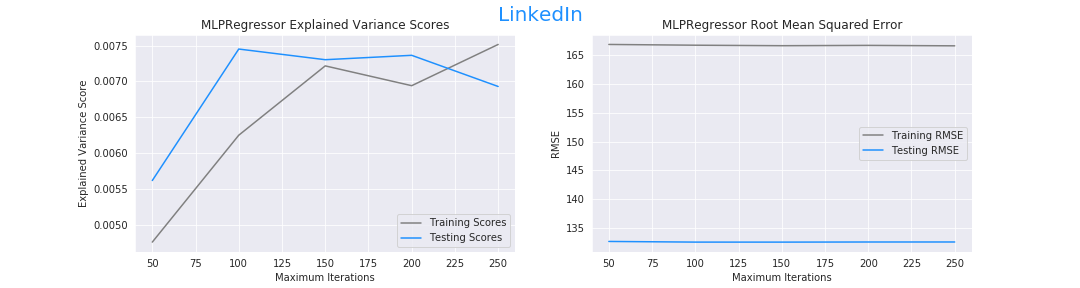

In [14]:
# allows plots to appear within the notebook
%matplotlib inline

i = 1
for platform in responses:
    
    scores = platformsScoresMLPR[platform]
    
    sns.set_style("darkgrid")
    plt.figure(i, figsize=(15,4)).suptitle(platform, fontsize=20, color=COLORS[platform])
    plt.subplot(121)
    plt.plot(max_iter_array, scores[0], color='grey', label='Training Scores')
    plt.plot(max_iter_array, scores[2], color=COLORS[platform], label='Testing Scores')

    plt.title('MLPRegressor Explained Variance Scores')
    plt.xlabel('Maximum Iterations')
    plt.ylabel('Explained Variance Score')
    plt.grid(True)
    plt.legend()


    plt.subplot(122)
    plt.plot(max_iter_array, scores[1], color='grey', label='Training RMSE')
    plt.plot(max_iter_array, scores[3], color=COLORS[platform], label='Testing RMSE')

    plt.title('MLPRegressor Root Mean Squared Error')
    plt.xlabel('Maximum Iterations')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.legend()
    
    i += 1